In [54]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [55]:
fouls_France = pd.read_csv("fouls_France.csv")
fouls_cleaned = pd.read_csv("fouls_cleaned.csv")

In [56]:
shots_France = pd.read_csv("shots_France.csv")
shots_cleaned = pd.read_csv("shots_cleaned.csv")

In [57]:
shots_cleaned.head()

,Unnamed: 0,matchId,shots,total shots,shots in second half,shots in first half,first half shot density,second half shot density
0,0,2500686,"[10.0, 14.0, 26.0, 30.0, 33.0, 35.0, 42.0, 47....",15,8,7,0.466667,0.533333
1,1,2500687,"[2.0, 9.0, 14.0, 21.0, 21.0, 24.0, 27.0, 31.0,...",20,9,11,0.550000,0.450000
2,2,2500688,"[1.0, 3.0, 9.0, 22.0, 23.0, 39.0, 46.0, 49.0, ...",16,10,6,0.375000,0.625000
3,3,2500689,"[4.0, 11.0, 16.0, 18.0, 19.0, 24.0, 25.0, 26.0...",27,15,12,0.444444,0.555556
4,4,2500690,"[3.0, 14.0, 18.0, 21.0, 21.0, 32.0, 34.0, 42.0...",14,5,9,0.642857,0.357143


In [58]:
fouls_cleaned.head()

,Unnamed: 0,matchId,fouls,total fouls,fouls in second half,fouls in first half,first half foul density,second half foul density
0,0,2500686,"[1.0, 3.0, 13.0, 20.0, 21.0, 23.0, 31.0, 31.0,...",32,19,13,0.406250,0.593750
1,1,2500687,"[9.0, 13.0, 17.0, 23.0, 25.0, 27.0, 32.0, 35.0...",29,19,10,0.344828,0.655172
2,2,2500688,"[10.0, 10.0, 15.0, 24.0, 27.0, 28.0, 30.0, 36....",26,13,13,0.500000,0.500000
3,3,2500689,"[1.0, 6.0, 7.0, 12.0, 14.0, 15.0, 35.0, 42.0, ...",18,9,9,0.500000,0.500000
4,4,2500690,"[6.0, 7.0, 17.0, 19.0, 19.0, 27.0, 33.0, 33.0,...",21,8,13,0.619048,0.380952


In [59]:
teams_id = pd.read_csv("teams.csv")
teams_id.head()

,city,name,wyId,officialName,area,type
0,Newcastle upon Tyne,Newcastle United,1613,Newcastle United FC,"{'name': 'England', 'id': '0', 'alpha3code': '...",club
1,Vigo,Celta de Vigo,692,Real Club Celta de Vigo,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",club
2,Barcelona,Espanyol,691,Reial Club Deportiu Espanyol,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",club
3,Vitoria-Gasteiz,Deportivo Alav\u00e9s,696,Deportivo Alav\u00e9s,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",club
4,Valencia,Levante,695,Levante UD,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",club


In [60]:
team_fouls = [teams_id.loc[teams_id["wyId"] == row[1]["teamId"]]["name"].to_string().split(' ')[-1] for row in fouls_France.iterrows()]
team_shots = [teams_id.loc[teams_id["wyId"] == row[1]["teamId"]]["name"].to_string().split(' ')[-1] for row in shots_France.iterrows()]


In [61]:
fouls_France.insert(4, "team", team_fouls)
shots_France.insert(4, "team", team_shots)

In [62]:
fouls_France.head()

,Unnamed: 0,eventId,subEventName,matchId,team,teamId,eventSec,eventMin
0,38,2,Foul,2500686,Angers,3799,68.621397,1.0
1,70,2,Foul,2500686,Bordeaux,3772,173.279043,3.0
2,271,2,Foul,2500686,Angers,3799,780.411047,13.0
3,397,2,Foul,2500686,Bordeaux,3772,1189.224805,20.0
4,424,2,Foul,2500686,Angers,3799,1259.367422,21.0


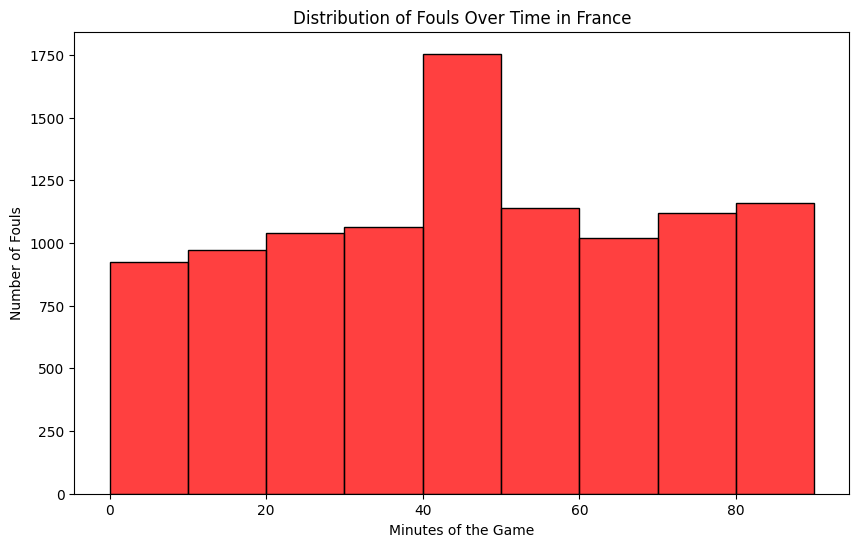

In [63]:
plt.figure(figsize=(10,6))
sns.histplot(fouls_France['eventMin'], bins=range(0, 100, 10), kde=False, color = "red")

plt.xlabel('Minutes of the Game')
plt.ylabel('Number of Fouls')
plt.title('Distribution of Fouls Over Time in France')

plt.show()

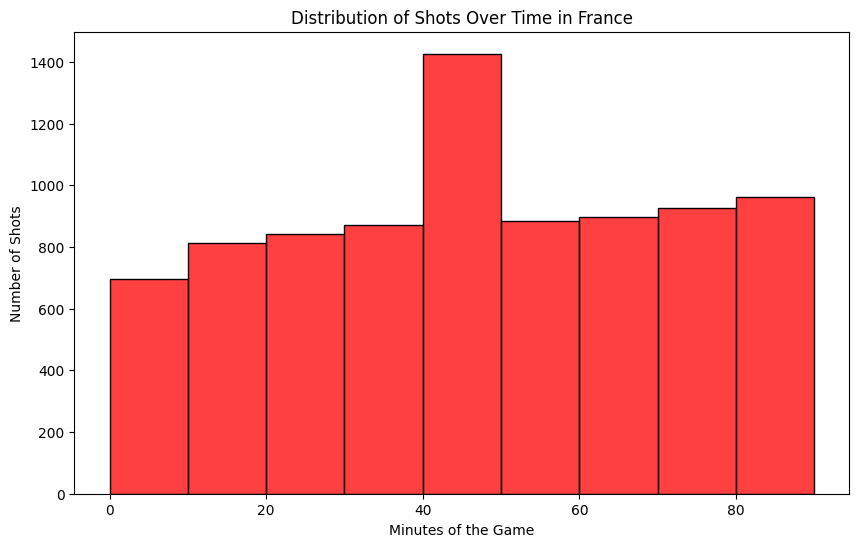

In [64]:
plt.figure(figsize=(10,6))
sns.histplot(shots_France['eventMin'], bins=range(0, 100, 10), kde=False, color = "red")

plt.xlabel('Minutes of the Game')
plt.ylabel('Number of Shots')
plt.title('Distribution of Shots Over Time in France')

plt.show()

## Late Game

In [65]:
%matplotlib inline

def compute_density(col):
    return sum(x >= 60 for x in col) / len(col)

def plot_team(tbl, metric, color, grid, ax_idx):
    team_data = tbl.groupby("team").apply(lambda x: compute_density(x["eventMin"]))
    return grid[ax_idx].scatter(x=team_data.index, y=team_data.values, c=color, label=metric), team_data.index

def plot_match(tbl, metric, color, grid, ax_idx):
    return grid[ax_idx].scatter(x=tbl["matchId"], y=tbl[f'second half {metric} density'], c=color)

def plot_two(tbls, metrics, colors, grid, ax_idx):
    data_1 = tbls[0].groupby("team").apply(lambda x: compute_density(x["eventMin"]))
    data_2 = tbls[1].groupby("team").apply(lambda x: compute_density(x["eventMin"]))
    return grid[ax_idx].scatter(x=data_1.values, y=data_2.values, c=colors)

def plot_match_two(tbls, metrics, color, grid, ax_idx):
    return grid[ax_idx].scatter(x=tbls[0][f'second half {metrics[0]} density'],
                                y=tbls[1][f'second half {metrics[1]} density'],
                                c=color)


<ipython-input-66-2bd3eb05f824>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=80)


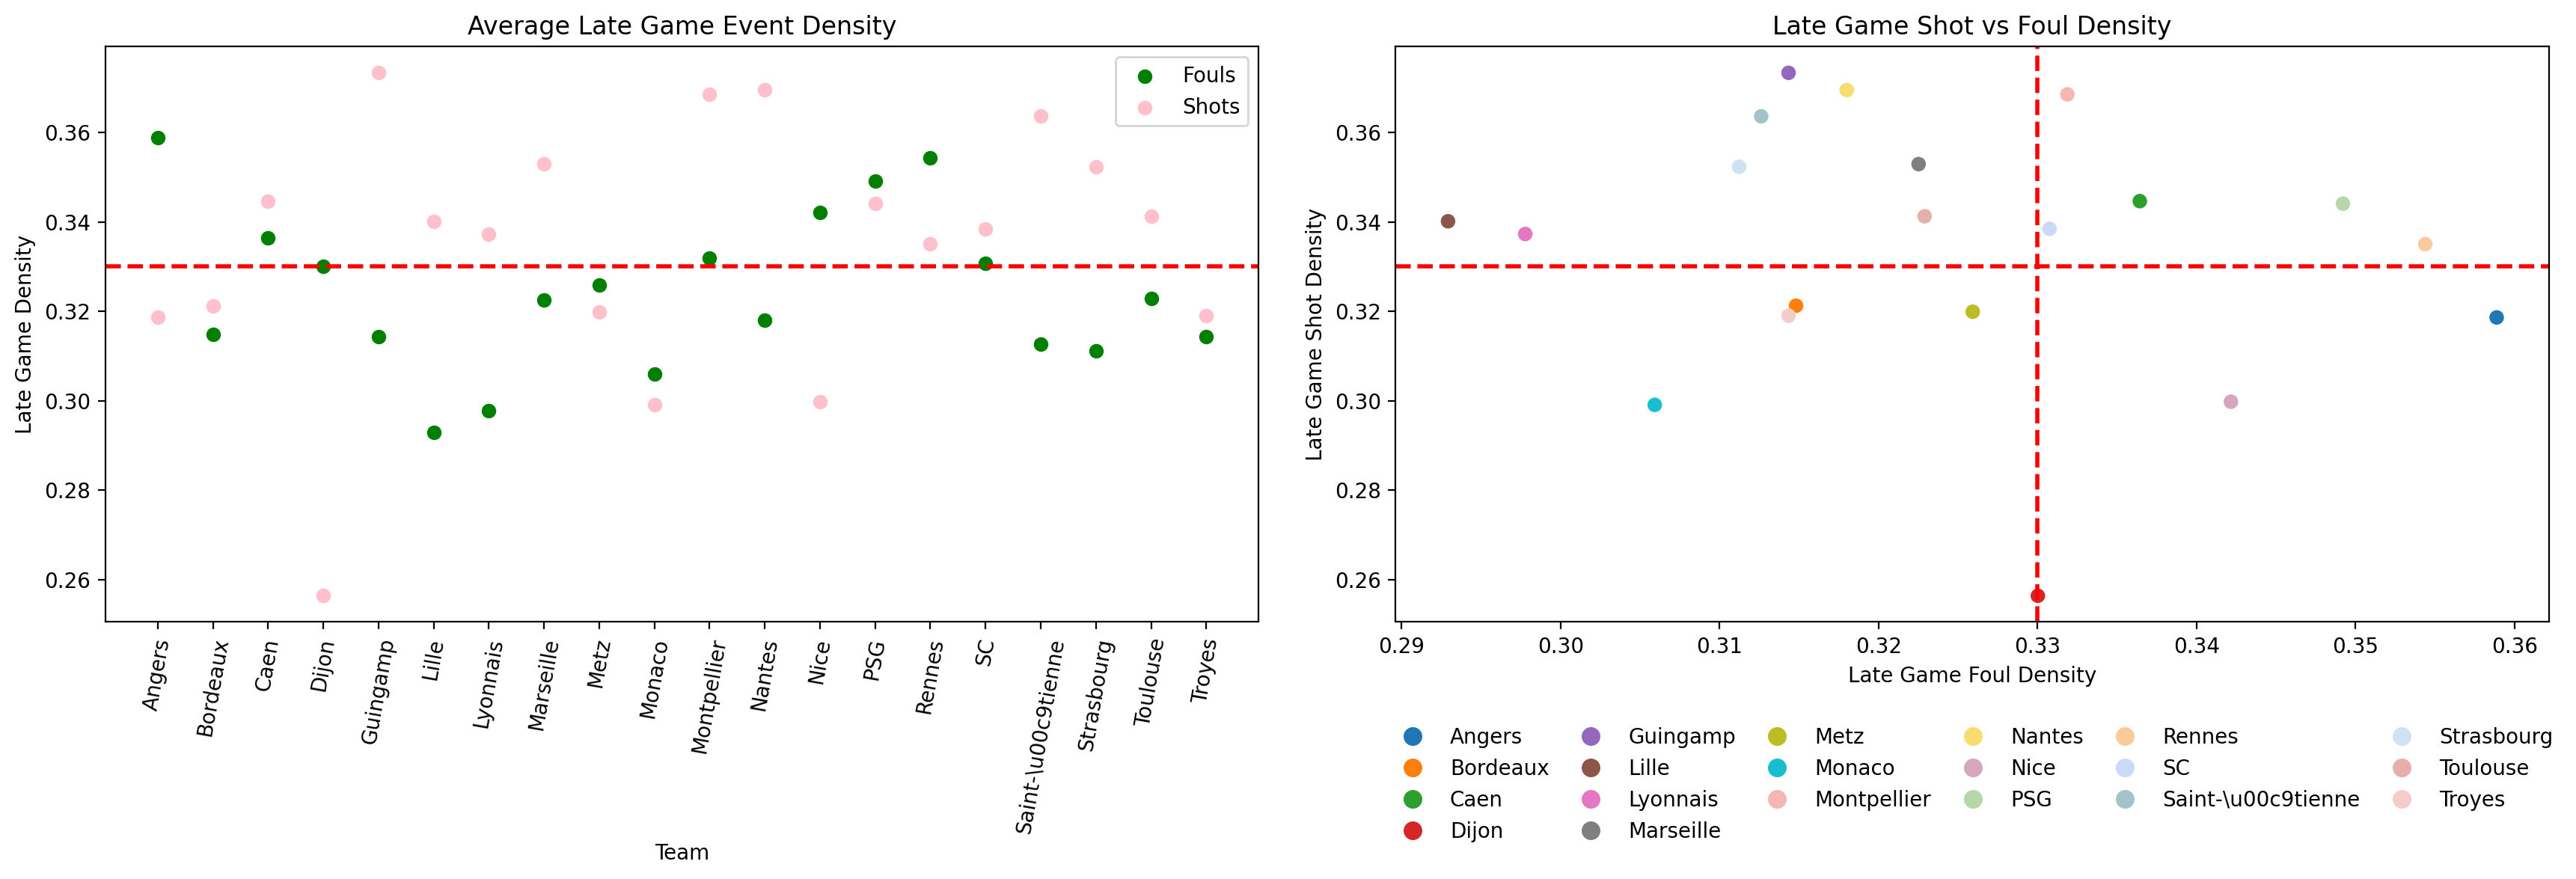

In [66]:
f_width, f_height = 18, 6
fig, axes = plt.subplots(ncols=2, figsize=(f_width, f_height), dpi=200)

fouls_team, teams = plot_team(fouls_France, "foul", "green", axes, 0)
shots_team, _ = plot_team(shots_France, "shot", "pink", axes, 0)

axes[0].set_title("Average Late Game Event Density")
axes[0].set_xlabel("Team")
axes[0].set_ylabel("Late Game Density")
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=80)
axes[0].legend([fouls_team, shots_team], ['Fouls', 'Shots'])
axes[0].axhline(y=0.33, color='red', linestyle='--', linewidth=2)

team_colors = [
    "#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b",
    "#e377c2", "#7f7f7f", "#bcbd22", "#17becf", "#f5b7b1", "#f7dc6f",
    "#d5a6bd", "#b6d7a8", "#f9cb9c", "#c9daf8", "#a2c4c9", "#cfe2f3",
    "#e6b0aa", "#f4cccc"
]
plot_two([fouls_France, shots_France], ["foul", "shot"], team_colors, axes, 1)

axes[1].set_title("Late Game Shot vs Foul Density")
axes[1].set_xlabel("Late Game Foul Density")
axes[1].set_ylabel("Late Game Shot Density")
axes[1].axvline(x=0.33, color='red', linestyle='--', linewidth=2)
axes[1].axhline(y=0.33, color='red', linestyle='--', linewidth=2)

legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=team,
                   markerfacecolor=color, markersize=10)
                   for team, color in zip(teams, team_colors)]

axes[1].legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=6, columnspacing=1, frameon=False)

plt.tight_layout()
plt.savefig('Late_Game_France.jpeg', format='jpeg', dpi=300)

plt.show()


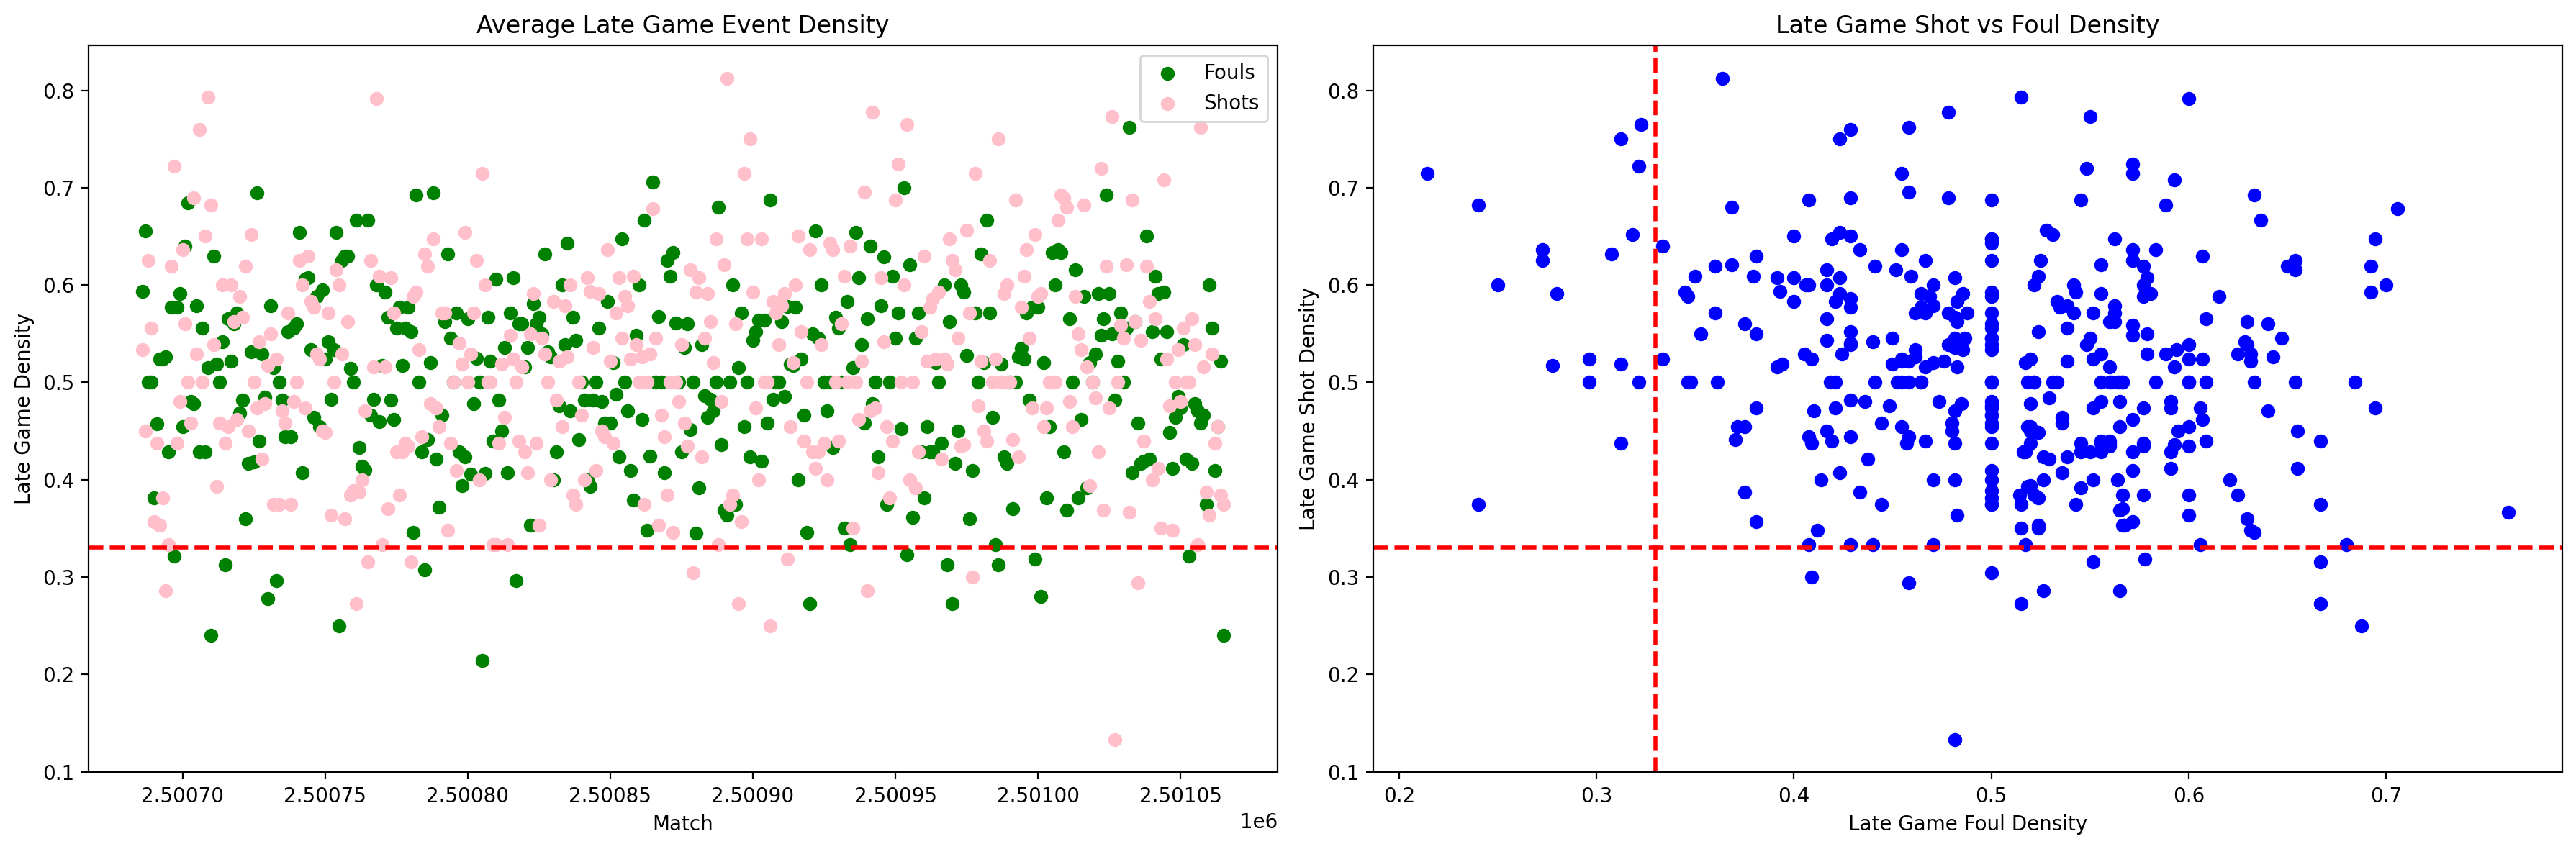

In [67]:
f_width, f_height = 18, 6
fig, axes = plt.subplots(ncols=2, figsize=(f_width, f_height), dpi=200)

fouls_match = plot_match(fouls_cleaned, "foul", "green", axes, 0)
shots_match = plot_match(shots_cleaned, "shot", "pink", axes, 0)

axes[0].set_title("Average Late Game Event Density")
axes[0].set_xlabel("Match")
axes[0].set_ylabel("Late Game Density")
axes[0].legend([fouls_match, shots_match], ['Fouls', 'Shots'])
axes[0].axhline(y=0.33, color='red', linestyle='--', linewidth=2)


plot_match_two([fouls_cleaned, shots_cleaned], ["foul", "shot"], "blue", axes, 1)

axes[1].set_title("Late Game Shot vs Foul Density")
axes[1].set_xlabel("Late Game Foul Density")
axes[1].set_ylabel("Late Game Shot Density")
axes[1].axvline(x=0.33, color='red', linestyle='--', linewidth=2)
axes[1].axhline(y=0.33, color='red', linestyle='--', linewidth=2)


plt.tight_layout()
plt.savefig('Late_Game_France_2.jpeg', format='jpeg', dpi=300)

plt.show()


Graphs

In [68]:
# Function to compute late-game event density
def compute_density(col):
    return sum(x >= 60 for x in col) / len(col)

# Plot bar graphs for teams
def plot_team(tbl, metric, color, grid, ax_idx):
    team_data = tbl.groupby("team").apply(lambda x: compute_density(x["eventMin"]))
    return grid[ax_idx].bar(x=team_data.index, height=team_data.values, color=color, label=metric), team_data.index

# Plot bar graphs for matches
def plot_match(tbl, metric, color, grid, ax_idx):
    return grid[ax_idx].bar(x=tbl["matchId"], height=tbl[f'second half {metric} density'], color=color)

# Plot two datasets with bar graphs (one on each axis)
def plot_two(tbls, metrics, colors, grid, ax_idx):
    data_1 = tbls[0].groupby("team").apply(lambda x: compute_density(x["eventMin"]))
    data_2 = tbls[1].groupby("team").apply(lambda x: compute_density(x["eventMin"]))

    bar_width = 0.4  # Width of the bars
    indices = np.arange(len(data_1))  # Positions for bars on x-axis

    # Plot the first dataset
    bars1 = grid[ax_idx].bar(indices - bar_width / 2, data_1.values, bar_width, label=metrics[0], color=colors[0])

    # Plot the second dataset
    bars2 = grid[ax_idx].bar(indices + bar_width / 2, data_2.values, bar_width, label=metrics[1], color=colors[1])

    # Label x-axis with team names
    grid[ax_idx].set_xticks(indices)
    grid[ax_idx].set_xticklabels(data_1.index, rotation=80)

    return bars1, bars2

# Plot two datasets for matches as bar graphs
def plot_match_two(tbls, metrics, color, grid, ax_idx):
    bar_width = 0.4  # Width of the bars
    indices = np.arange(len(tbls[0][f'second half {metrics[0]} density']))  # Positions for bars on x-axis

    # Plot the first dataset
    bars1 = grid[ax_idx].bar(indices - bar_width / 2, tbls[0][f'second half {metrics[0]} density'], bar_width, color=color[0], label=metrics[0])

    # Plot the second dataset
    bars2 = grid[ax_idx].bar(indices + bar_width / 2, tbls[1][f'second half {metrics[1]} density'], bar_width, color=color[1], label=metrics[1])

    # Label x-axis with match IDs
    grid[ax_idx].set_xticks(indices)
    grid[ax_idx].set_xticklabels(tbls[0]["matchId"], rotation=80)

    return bars1, bars2

<ipython-input-69-1d281d10c98c>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=80)


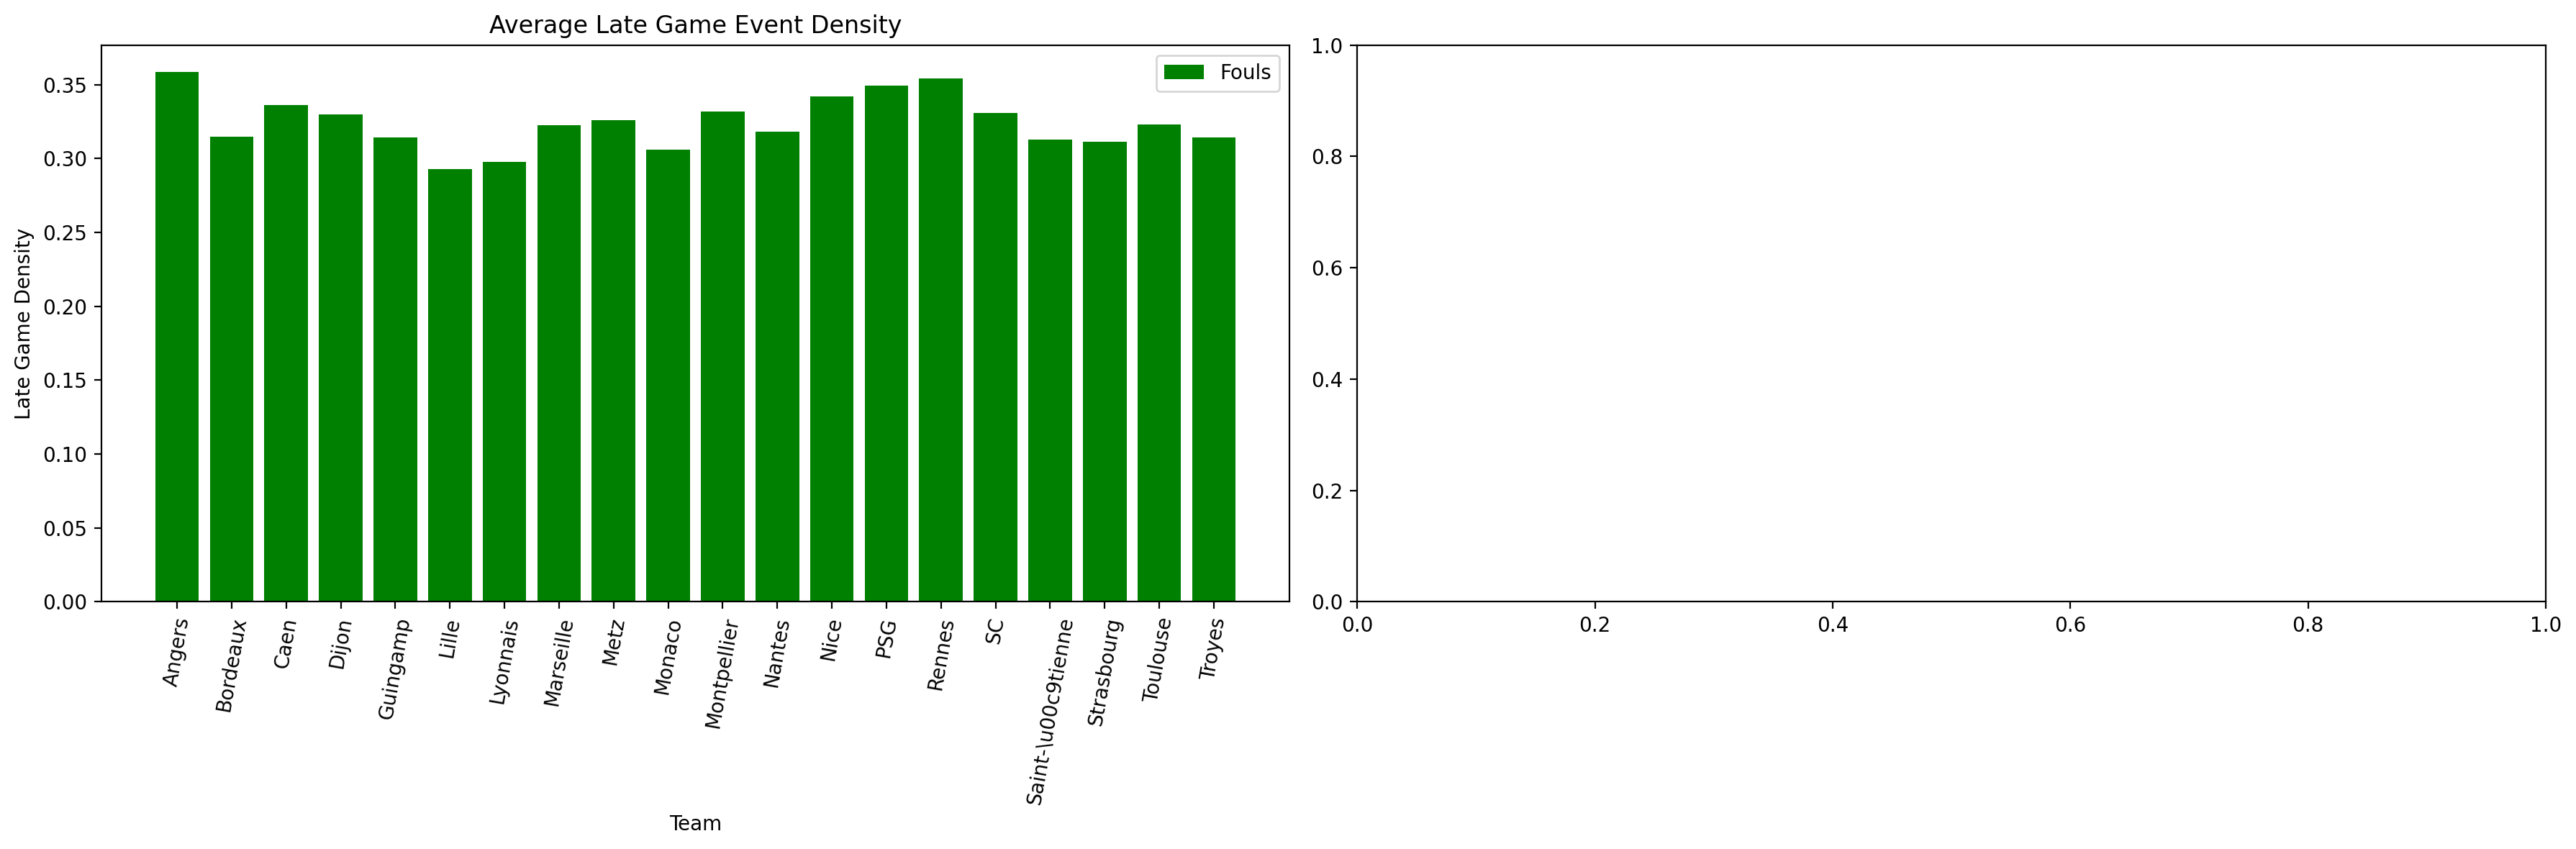

In [69]:
f_width, f_height = 18, 6
fig, axes = plt.subplots(ncols=2, figsize=(f_width, f_height), dpi=200)

fouls_team, teams = plot_team(fouls_France, "foul", "green", axes, 0)
#shots_team, _ = plot_team(shots_France, "shot", "pink", axes, 0)

axes[0].set_title("Average Late Game Event Density")
axes[0].set_xlabel("Team")
axes[0].set_ylabel("Late Game Density")
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=80)
axes[0].legend([fouls_team], ['Fouls'])

team_colors = [
    "#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b",
    "#e377c2", "#7f7f7f", "#bcbd22", "#17becf", "#f5b7b1", "#f7dc6f",
    "#d5a6bd", "#b6d7a8", "#f9cb9c", "#c9daf8", "#a2c4c9", "#cfe2f3",
    "#e6b0aa", "#f4cccc"
]

plt.tight_layout()
plt.savefig('Bar_Graph_Foul.jpeg', format='jpeg', dpi=300)

plt.show()


<ipython-input-70-187e4ab7e2c2>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=80)


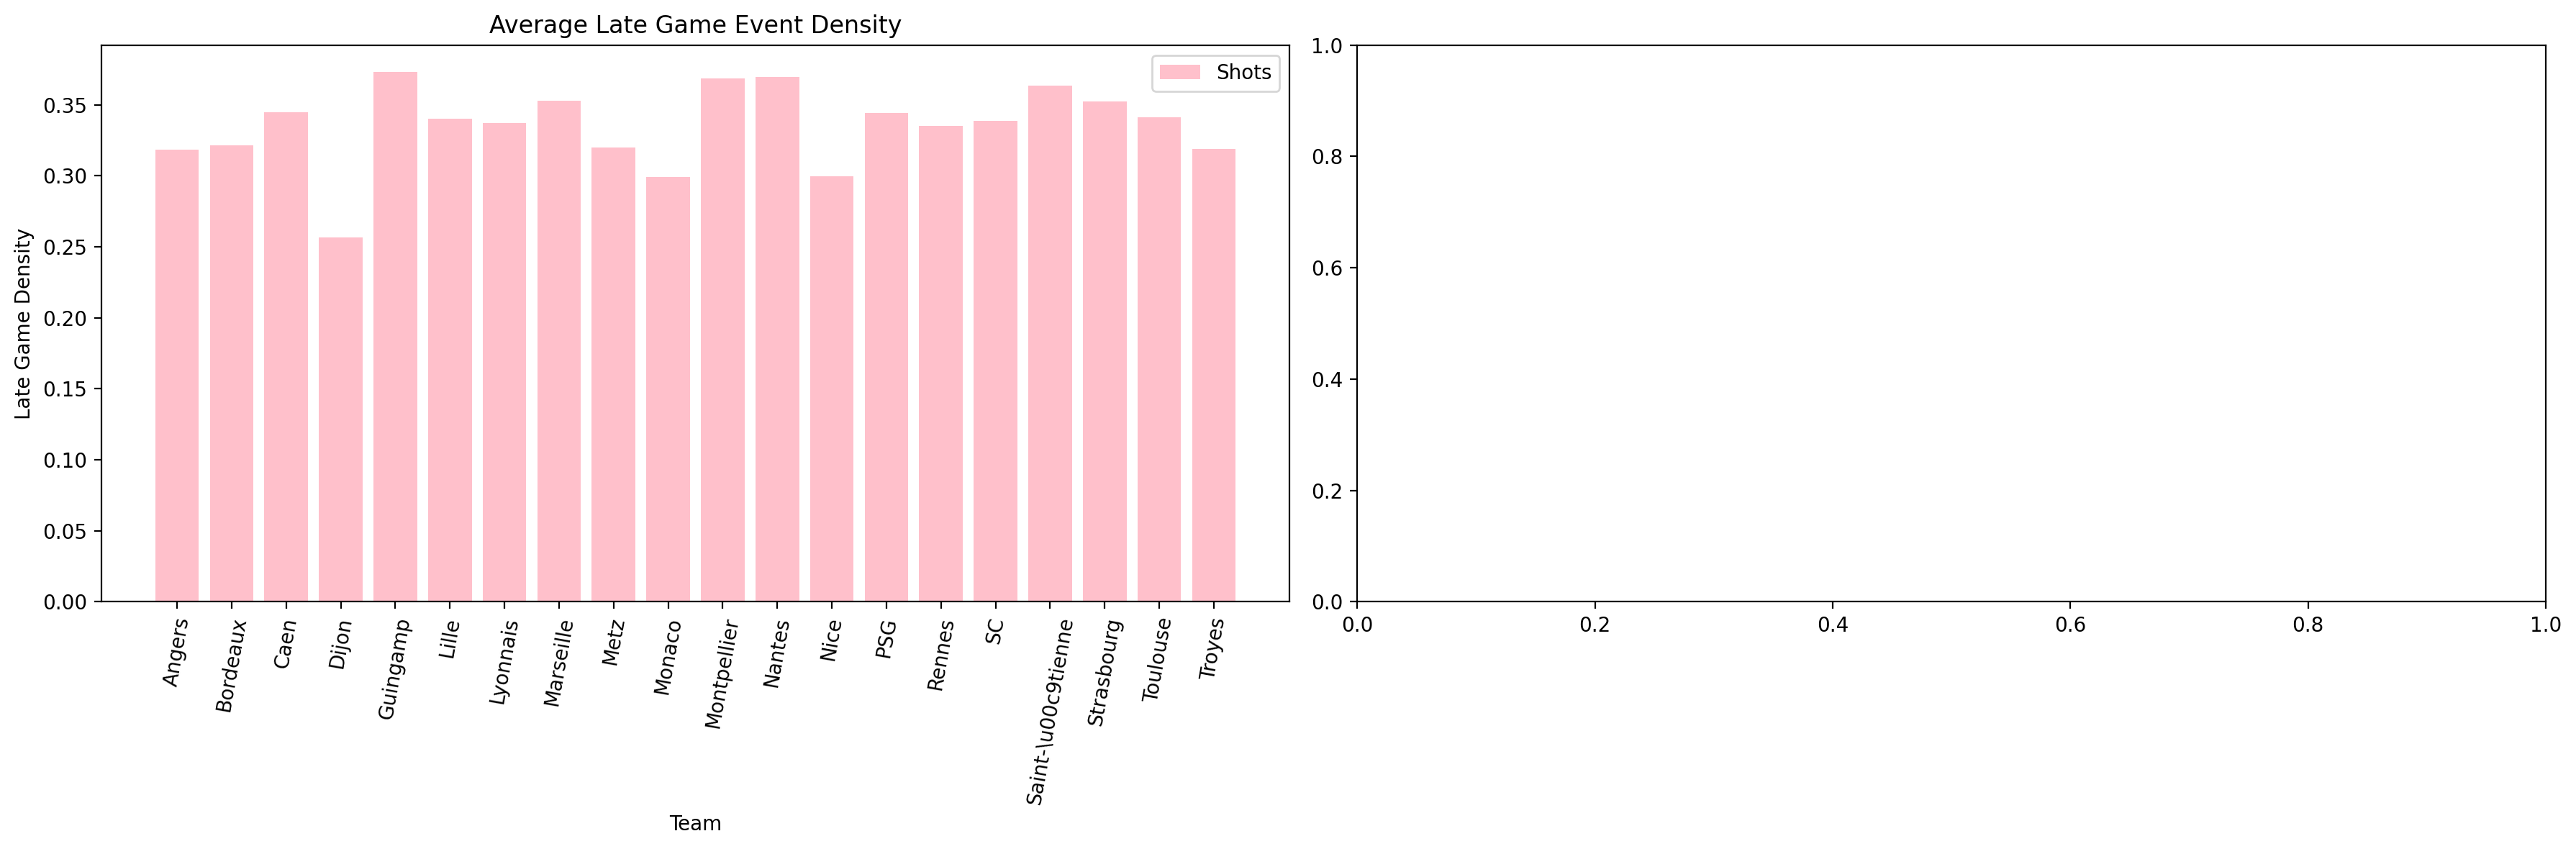

In [70]:
f_width, f_height = 18, 6
fig, axes = plt.subplots(ncols=2, figsize=(f_width, f_height), dpi=200)

#fouls_team, teams = plot_team(fouls_France, "foul", "green", axes, 0)
shots_team, _ = plot_team(shots_France, "shot", "pink", axes, 0)

axes[0].set_title("Average Late Game Event Density")
axes[0].set_xlabel("Team")
axes[0].set_ylabel("Late Game Density")
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=80)
axes[0].legend([shots_team], ['Shots'])

team_colors = [
    "#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b",
    "#e377c2", "#7f7f7f", "#bcbd22", "#17becf", "#f5b7b1", "#f7dc6f",
    "#d5a6bd", "#b6d7a8", "#f9cb9c", "#c9daf8", "#a2c4c9", "#cfe2f3",
    "#e6b0aa", "#f4cccc"
]

plt.tight_layout()
plt.savefig('Bar_Graph_.jpeg', format='jpeg', dpi=300)

plt.show()


First Half

In [71]:
%matplotlib inline

def compute_density(col):
    return sum(x <= 60 for x in col) / len(col)

def plot_team(tbl, metric, color, grid, ax_idx):
    team_data = tbl.groupby("team").apply(lambda x: compute_density(x["eventMin"]))
    return grid[ax_idx].scatter(x=team_data.index, y=team_data.values, c=color, label=metric), team_data.index

def plot_match(tbl, metric, color, grid, ax_idx):
    return grid[ax_idx].scatter(x=tbl["matchId"], y=tbl[f'first half {metric} density'], c=color)

def plot_two(tbls, metrics, colors, grid, ax_idx):
    data_1 = tbls[0].groupby("team").apply(lambda x: compute_density(x["eventMin"]))
    data_2 = tbls[1].groupby("team").apply(lambda x: compute_density(x["eventMin"]))
    return grid[ax_idx].scatter(x=data_1.values, y=data_2.values, c=colors)

def plot_match_two(tbls, metrics, color, grid, ax_idx):
    return grid[ax_idx].scatter(x=tbls[0][f'first half {metrics[0]} density'],
                                y=tbls[1][f'first half {metrics[1]} density'],
                                c=color)


<ipython-input-72-c30d50d661bb>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=80)


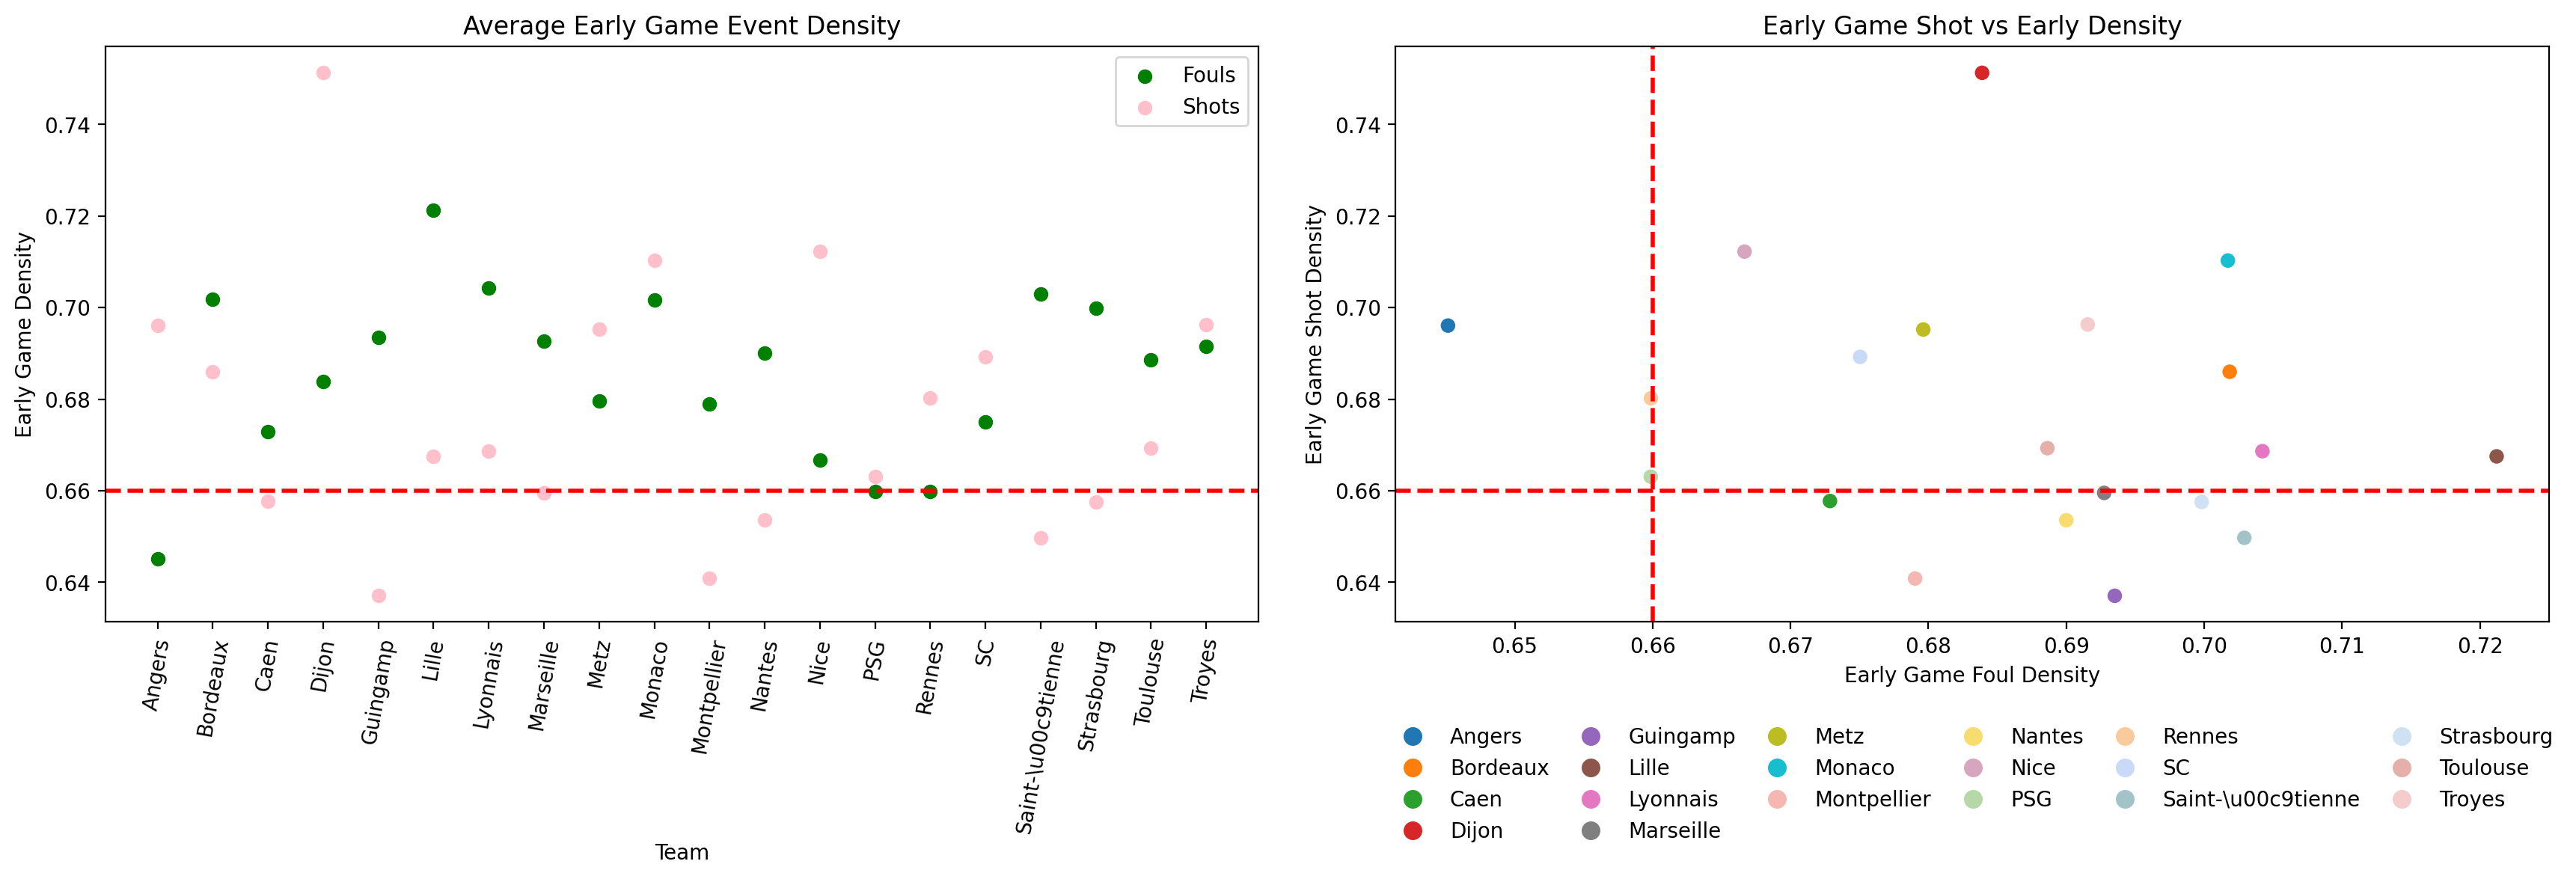

In [72]:
f_width, f_height = 18, 6
fig, axes = plt.subplots(ncols=2, figsize=(f_width, f_height), dpi=200)

fouls_team, teams = plot_team(fouls_France, "foul", "green", axes, 0)
shots_team, _ = plot_team(shots_France, "shot", "pink", axes, 0)

axes[0].set_title("Average Early Game Event Density")
axes[0].set_xlabel("Team")
axes[0].set_ylabel("Early Game Density")
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=80)
axes[0].legend([fouls_team, shots_team], ['Fouls', 'Shots'])
axes[0].axhline(y=0.66, color='red', linestyle='--', linewidth=2)


team_colors = [
    "#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b",
    "#e377c2", "#7f7f7f", "#bcbd22", "#17becf", "#f5b7b1", "#f7dc6f",
    "#d5a6bd", "#b6d7a8", "#f9cb9c", "#c9daf8", "#a2c4c9", "#cfe2f3",
    "#e6b0aa", "#f4cccc"
]
plot_two([fouls_France, shots_France], ["foul", "shot"], team_colors, axes, 1)

axes[1].set_title("Early Game Shot vs Early Density")
axes[1].set_xlabel("Early Game Foul Density")
axes[1].set_ylabel("Early Game Shot Density")
axes[1].axvline(x=0.66, color='red', linestyle='--', linewidth=2)
axes[1].axhline(y=0.66, color='red', linestyle='--', linewidth=2)


legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=team,
                   markerfacecolor=color, markersize=10)
                   for team, color in zip(teams, team_colors)]

axes[1].legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=6, columnspacing=1, frameon=False)

plt.tight_layout()
plt.savefig('Early_Game_France.jpeg', format='jpeg', dpi=300)

plt.show()


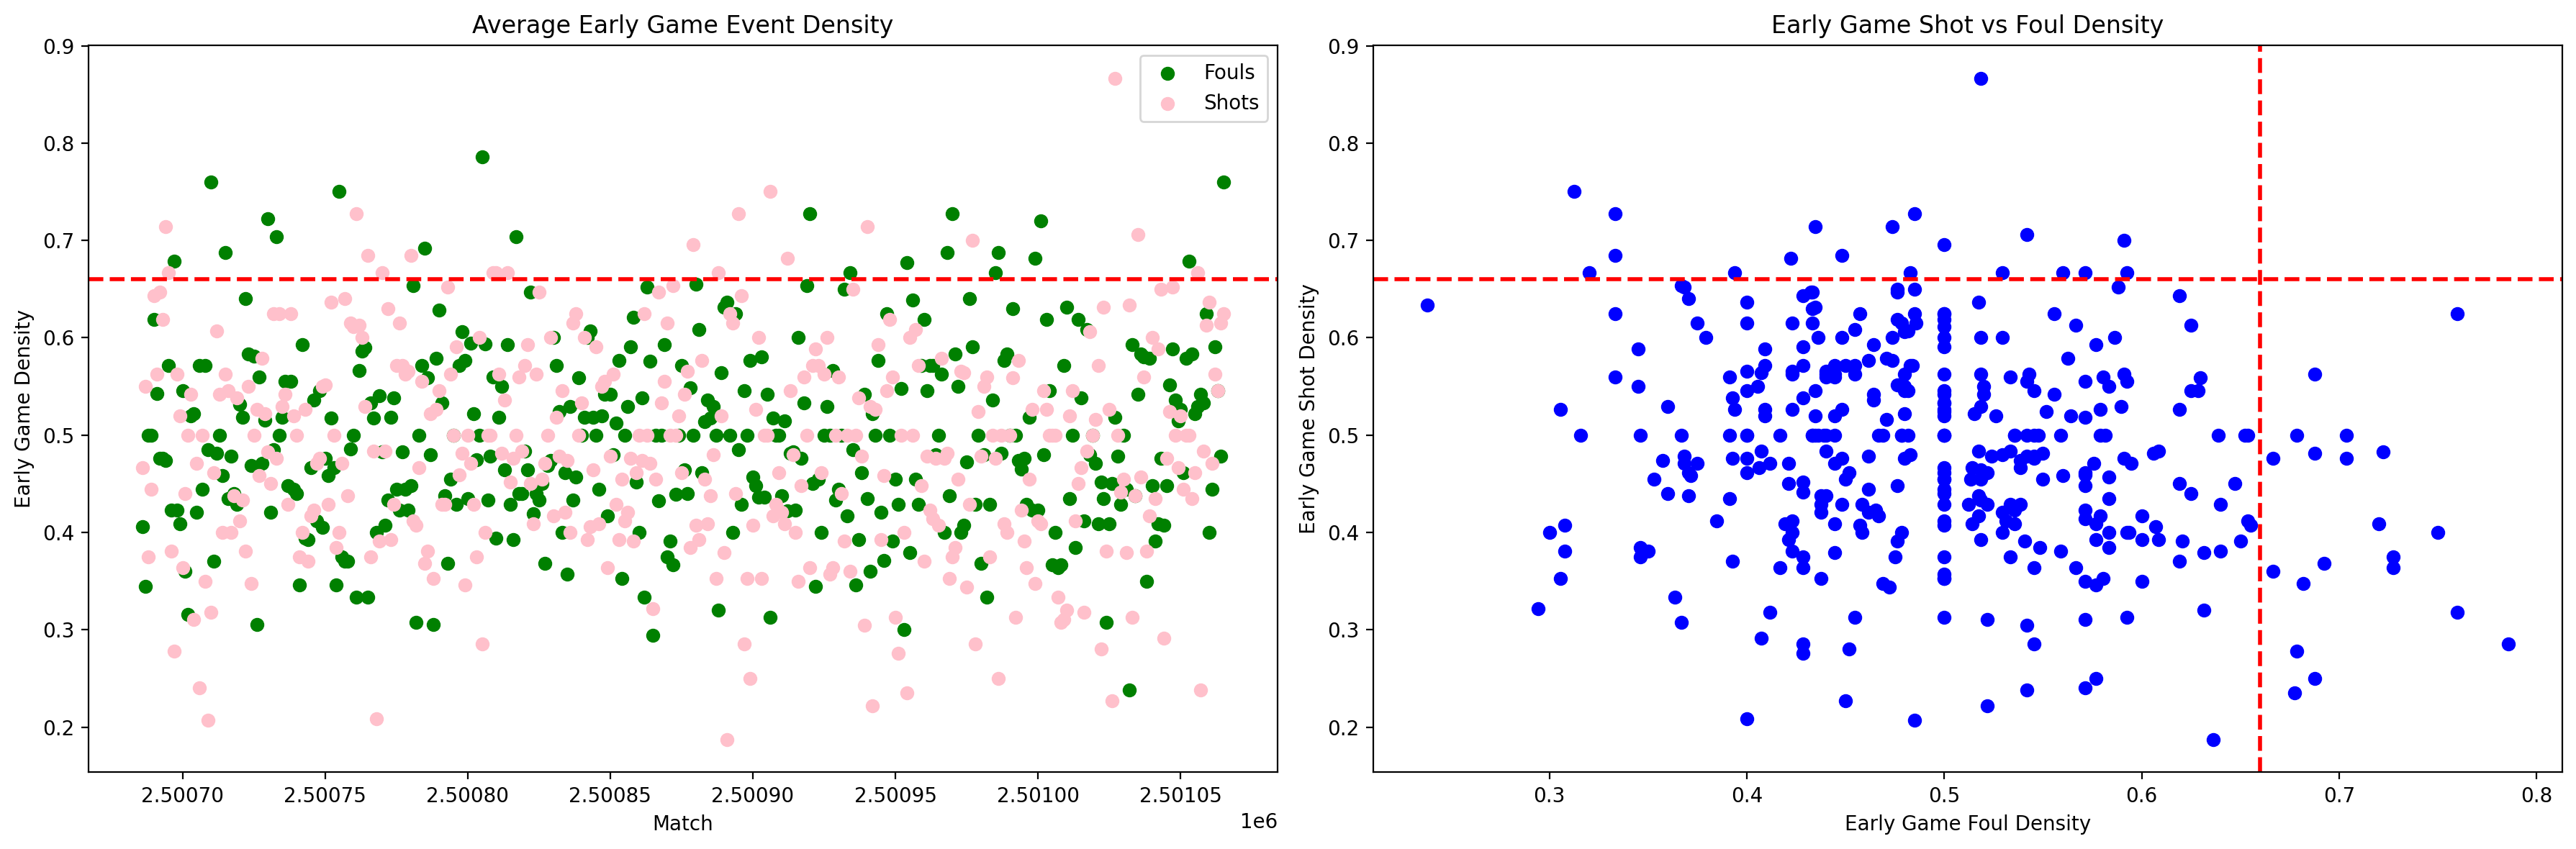

In [73]:
f_width, f_height = 18, 6
fig, axes = plt.subplots(ncols=2, figsize=(f_width, f_height), dpi=200)

fouls_match = plot_match(fouls_cleaned, "foul", "green", axes, 0)
shots_match = plot_match(shots_cleaned, "shot", "pink", axes, 0)

axes[0].set_title("Average Early Game Event Density")
axes[0].set_xlabel("Match")
axes[0].set_ylabel("Early Game Density")
axes[0].legend([fouls_match, shots_match], ['Fouls', 'Shots'])
axes[0].axhline(y=0.66, color='red', linestyle='--', linewidth=2)

plot_match_two([fouls_cleaned, shots_cleaned], ["foul", "shot"], "blue", axes, 1)

axes[1].set_title("Early Game Shot vs Foul Density")
axes[1].set_xlabel("Early Game Foul Density")
axes[1].set_ylabel("Early Game Shot Density")
axes[1].axvline(x=0.66, color='red', linestyle='--', linewidth=2)
axes[1].axhline(y=0.66, color='red', linestyle='--', linewidth=2)


plt.tight_layout()
plt.savefig('Early_Game_France_2.jpeg', format='jpeg', dpi=300)

plt.show()


Graphs

In [77]:
# Function to compute late-game event density
def compute_density(col):
    return sum(x <= 60 for x in col) / len(col)

# Plot bar graphs for teams
def plot_team(tbl, metric, color, grid, ax_idx):
    team_data = tbl.groupby("team").apply(lambda x: compute_density(x["eventMin"]))
    return grid[ax_idx].bar(x=team_data.index, height=team_data.values, color=color, label=metric), team_data.index

# Plot bar graphs for matches
def plot_match(tbl, metric, color, grid, ax_idx):
    return grid[ax_idx].bar(x=tbl["matchId"], height=tbl[f'first half {metric} density'], color=color)

# Plot two datasets with bar graphs (one on each axis)
def plot_two(tbls, metrics, colors, grid, ax_idx):
    data_1 = tbls[0].groupby("team").apply(lambda x: compute_density(x["eventMin"]))
    data_2 = tbls[1].groupby("team").apply(lambda x: compute_density(x["eventMin"]))

    bar_width = 0.4  # Width of the bars
    indices = np.arange(len(data_1))  # Positions for bars on x-axis

    # Plot the first dataset
    bars1 = grid[ax_idx].bar(indices - bar_width / 2, data_1.values, bar_width, label=metrics[0], color=colors[0])

    # Plot the second dataset
    bars2 = grid[ax_idx].bar(indices + bar_width / 2, data_2.values, bar_width, label=metrics[1], color=colors[1])

    # Label x-axis with team names
    grid[ax_idx].set_xticks(indices)
    grid[ax_idx].set_xticklabels(data_1.index, rotation=80)

    return bars1, bars2

# Plot two datasets for matches as bar graphs
def plot_match_two(tbls, metrics, color, grid, ax_idx):
    bar_width = 0.4  # Width of the bars
    indices = np.arange(len(tbls[0][f'first half {metrics[0]} density']))  # Positions for bars on x-axis

    # Plot the first dataset
    bars1 = grid[ax_idx].bar(indices - bar_width / 2, tbls[0][f'first half {metrics[0]} density'], bar_width, color=color[0], label=metrics[0])

    # Plot the second dataset
    bars2 = grid[ax_idx].bar(indices + bar_width / 2, tbls[1][f'first half {metrics[1]} density'], bar_width, color=color[1], label=metrics[1])

    # Label x-axis with match IDs
    grid[ax_idx].set_xticks(indices)
    grid[ax_idx].set_xticklabels(tbls[0]["matchId"], rotation=80)

    return bars1, bars2

<ipython-input-78-c4d0954f27e2>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=80)


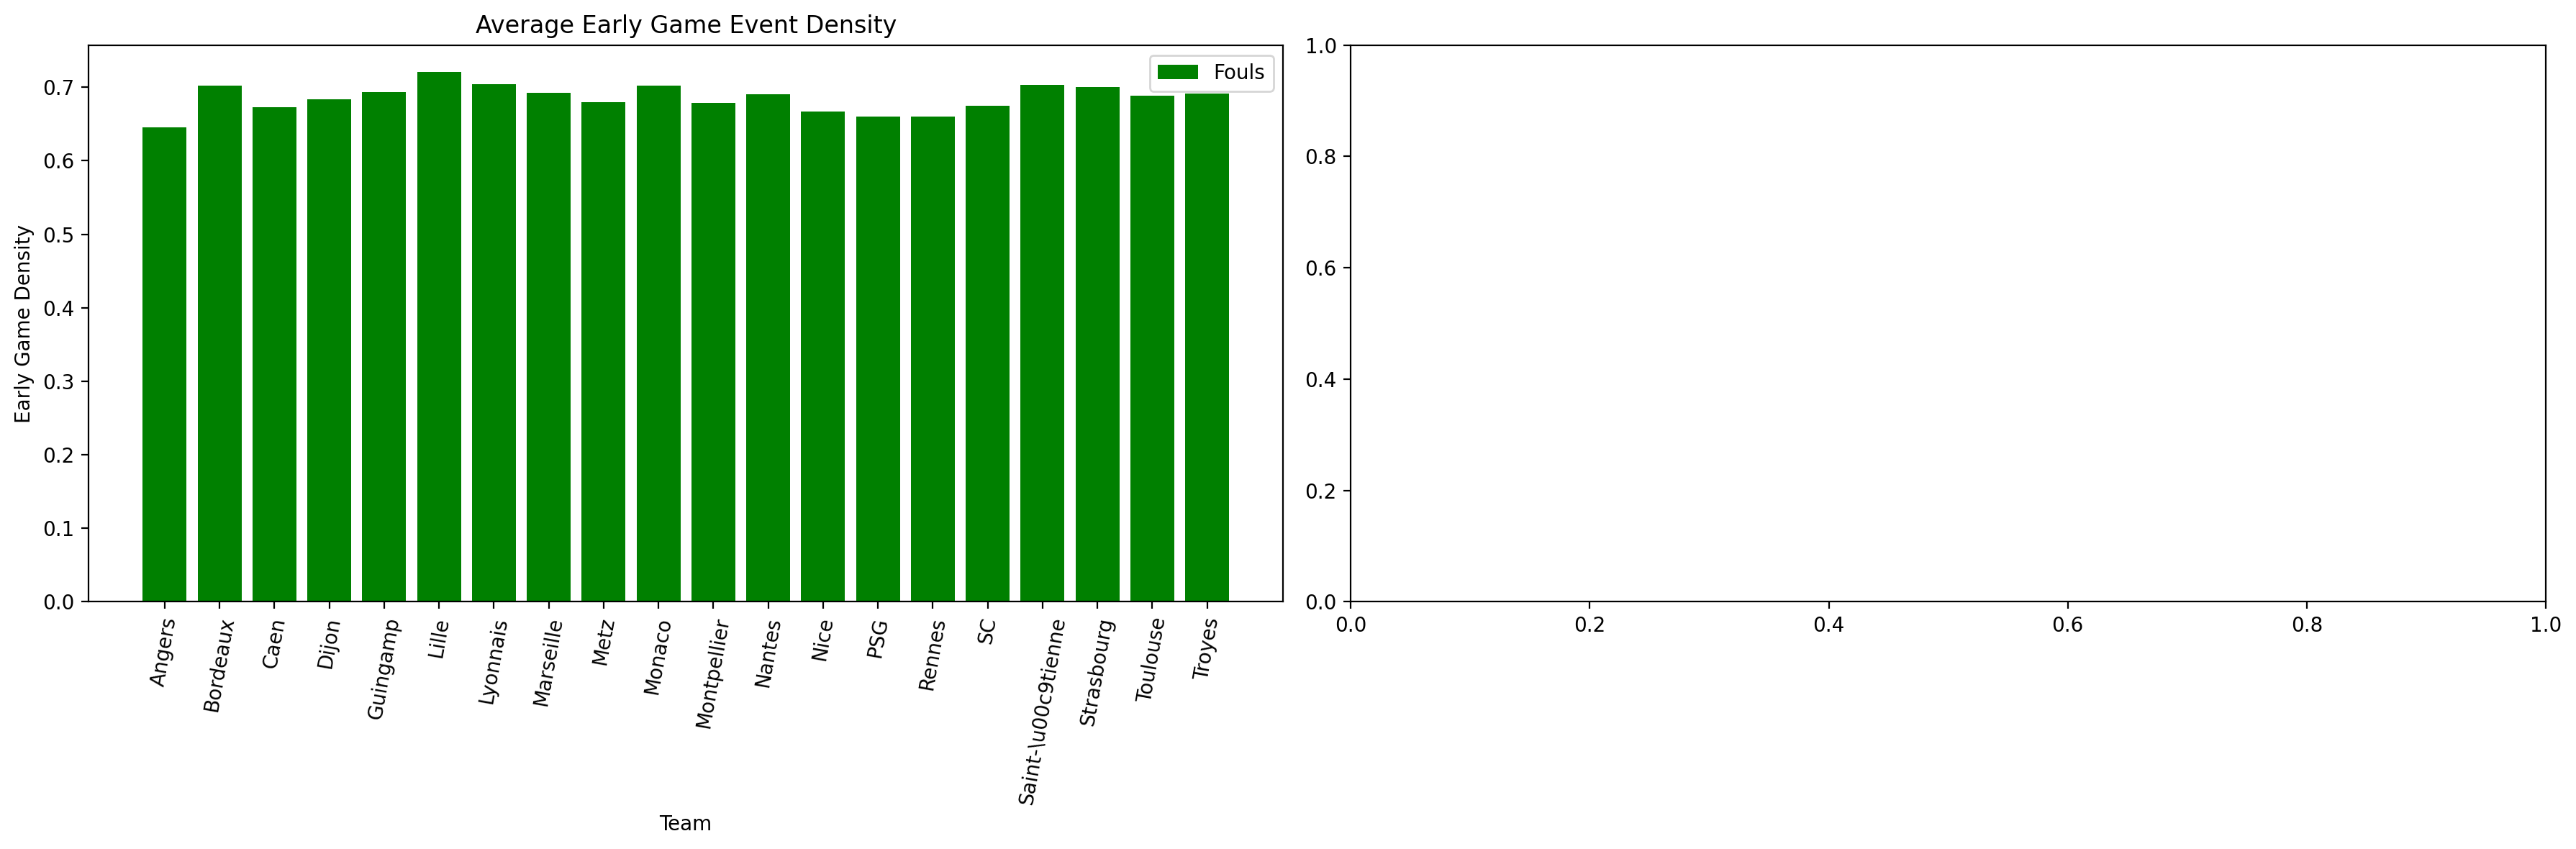

In [78]:
f_width, f_height = 18, 6
fig, axes = plt.subplots(ncols=2, figsize=(f_width, f_height), dpi=200)

fouls_team, teams = plot_team(fouls_France, "foul", "green", axes, 0)
#shots_team, _ = plot_team(shots_France, "shot", "pink", axes, 0)

axes[0].set_title("Average Early Game Event Density")
axes[0].set_xlabel("Team")
axes[0].set_ylabel("Early Game Density")
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=80)
axes[0].legend([fouls_team], ['Fouls'])

team_colors = [
    "#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b",
    "#e377c2", "#7f7f7f", "#bcbd22", "#17becf", "#f5b7b1", "#f7dc6f",
    "#d5a6bd", "#b6d7a8", "#f9cb9c", "#c9daf8", "#a2c4c9", "#cfe2f3",
    "#e6b0aa", "#f4cccc"
]

plt.tight_layout()
plt.savefig('Early_Bar_1.jpeg', format='jpeg', dpi=300)

plt.show()


<ipython-input-79-3b643bedf33f>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=80)


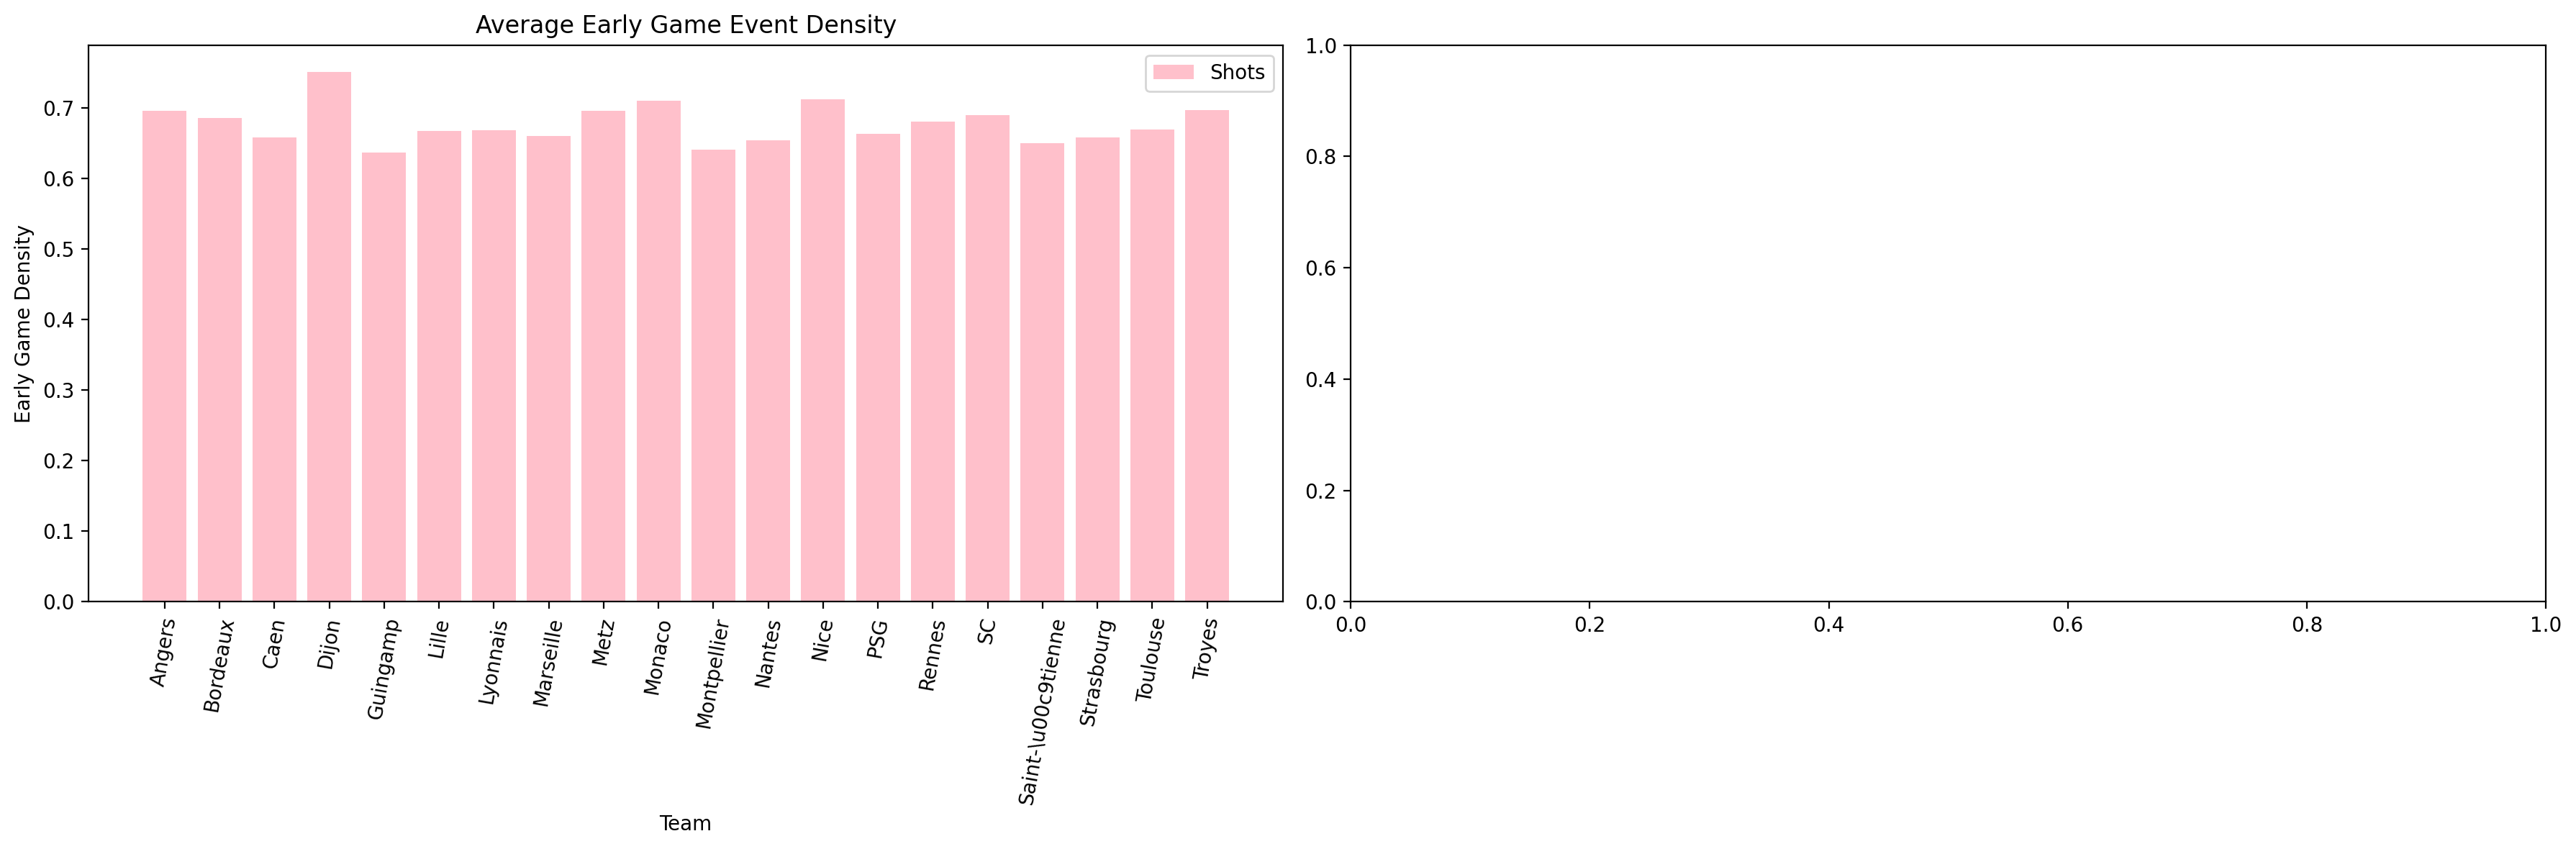

In [79]:
f_width, f_height = 18, 6
fig, axes = plt.subplots(ncols=2, figsize=(f_width, f_height), dpi=200)

#fouls_team, teams = plot_team(fouls_France, "foul", "green", axes, 0)
shots_team, _ = plot_team(shots_France, "shot", "pink", axes, 0)

axes[0].set_title("Average Early Game Event Density")
axes[0].set_xlabel("Team")
axes[0].set_ylabel("Early Game Density")
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=80)
axes[0].legend([shots_team], ['Shots'])

team_colors = [
    "#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b",
    "#e377c2", "#7f7f7f", "#bcbd22", "#17becf", "#f5b7b1", "#f7dc6f",
    "#d5a6bd", "#b6d7a8", "#f9cb9c", "#c9daf8", "#a2c4c9", "#cfe2f3",
    "#e6b0aa", "#f4cccc"
]

plt.tight_layout()
plt.savefig('Early_Bar_2.jpeg', format='jpeg', dpi=300)

plt.show()
